# Forecast Exchange Rates

## Importing Library

In [1]:
#VIZ AND DATA MANIPULATION LIBRARY
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#plotly
from plotly import tools
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#datetime
import datetime as dt

#warnings
import warnings 
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
inrusd = pd.read_csv('Dataset.csv',parse_dates=["observation_date"])
inrusd.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


### Copy Data

In [3]:
#Copy Data
df = inrusd.copy()
df.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


#### Shape

In [4]:
df.shape

(12649, 2)

#### Renaming 

In [5]:
#renaming the date and rate
data = df[['observation_date', 'DEXINUS']]
data.columns = ['date', 'rate']

In [6]:
data.head()

,date,rate
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


#### info

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12649 non-null  datetime64[ns]
 1   rate    12155 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 197.8 KB


Converting rates to numeric

In [8]:
data['rate'] = pd.to_numeric(data.rate)

Sorting Date in Ascending order

In [9]:
data = data.sort_values('date', ascending=True)

#### Descriptive Stats

In [10]:
data.rate.describe()

count    12155.000000
mean        34.206133
std         21.089190
min          7.190000
25%         12.075000
50%         35.890000
75%         47.650000
max         76.950000
Name: rate, dtype: float64

#### Checking Null Values

In [11]:
data.isnull().sum()

date      0
rate    494
dtype: int64

Forward Filling Null Values

In [12]:
#Forward Filling
data.fillna(method='ffill', inplace=True)

In [13]:
data.isnull().sum()

date    0
rate    0
dtype: int64

Convert datatype int to float

In [14]:
#transformation of values to float
data['rate'] = pd.to_numeric(data['rate'], downcast="float")

#### info

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12649 non-null  datetime64[ns]
 1   rate    12649 non-null  float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 247.1 KB


#### Checking Duplicates

In [16]:
data.duplicated().sum()

0

No Duplicates found

### Final Data

In [17]:
final_data = data.copy()

In [18]:
final_data.head()

,date,rate
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [19]:
data1 = data.copy()

In [20]:
#data1 = data.set_index('date')

In [21]:
data1.head()

,date,rate
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [22]:
final_data1 = data1.copy()

### Segregating Years, Months, Day

In [23]:
#copy data 
df1 = final_data.copy()

In [24]:
#if date is not set to index then use 
#Years
df1['Year']= [i.year for i in df1['date']]
#Months
df1['Month']= [i.month for i in df1['date']]
#Days
df1['Day']= [i.day for i in df1['date']]

In [25]:
#Date is set to index
#Years
#df1['Year']= df1.index.year
#Months
#df1['Month']= df1.index.month
#Days
#df1['Day']= df1.index.day

In [26]:
df1.head()

,date,rate,Year,Month,Day
0,1973-01-02,8.02,1973,1,2
1,1973-01-03,8.02,1973,1,3
2,1973-01-04,8.00,1973,1,4
3,1973-01-05,8.01,1973,1,5
4,1973-01-08,8.00,1973,1,8


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12649 entries, 0 to 12648
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12649 non-null  datetime64[ns]
 1   rate    12649 non-null  float32       
 2   Year    12649 non-null  int64         
 3   Month   12649 non-null  int64         
 4   Day     12649 non-null  int64         
dtypes: datetime64[ns](1), float32(1), int64(3)
memory usage: 543.5 KB


## Visialization

### Line Plot

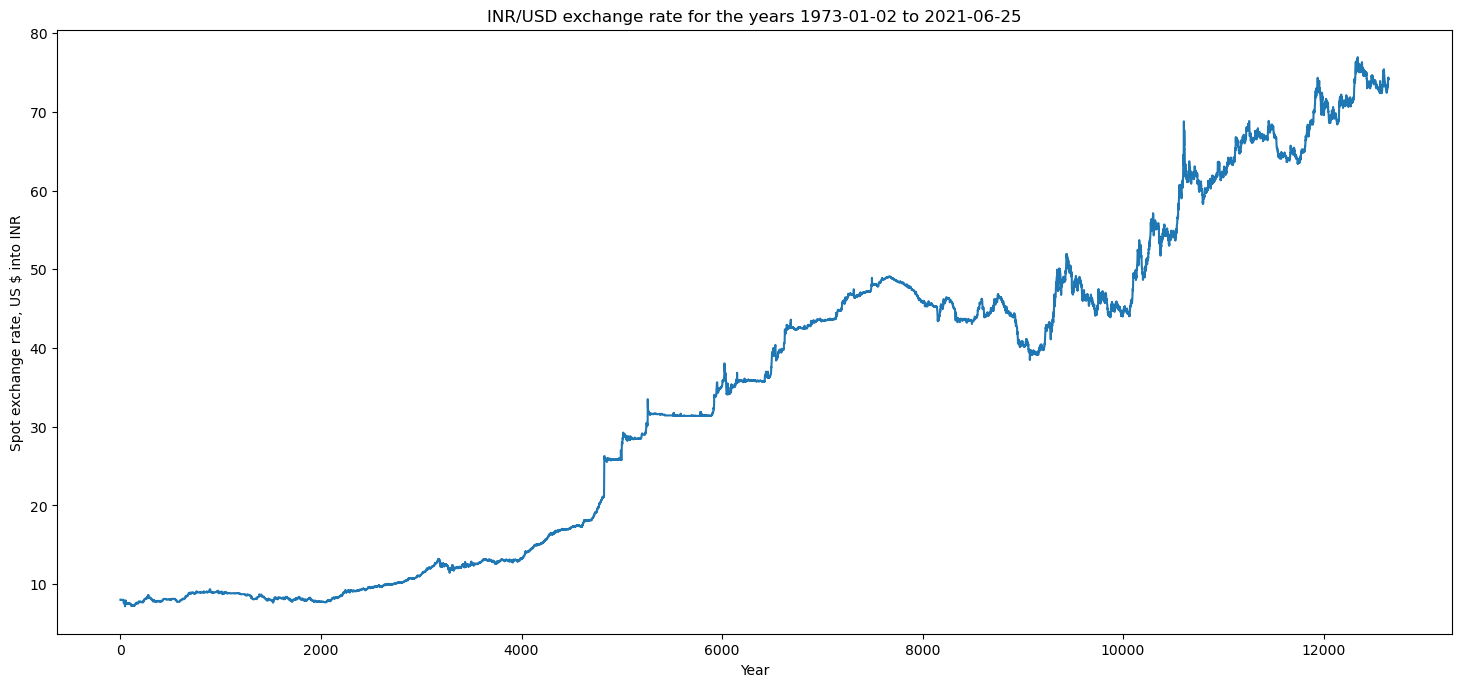

In [28]:
#Line Plot
plt.figure(figsize =(18,8),dpi=100)
df1.rate.plot()
plt.ylabel('Spot exchange rate, US \$ into INR')
plt.xlabel('Year')
plt.title('INR/USD exchange rate for the years 1973-01-02 to 2021-06-25')
plt.show()

### Line Plot on 10 years interval

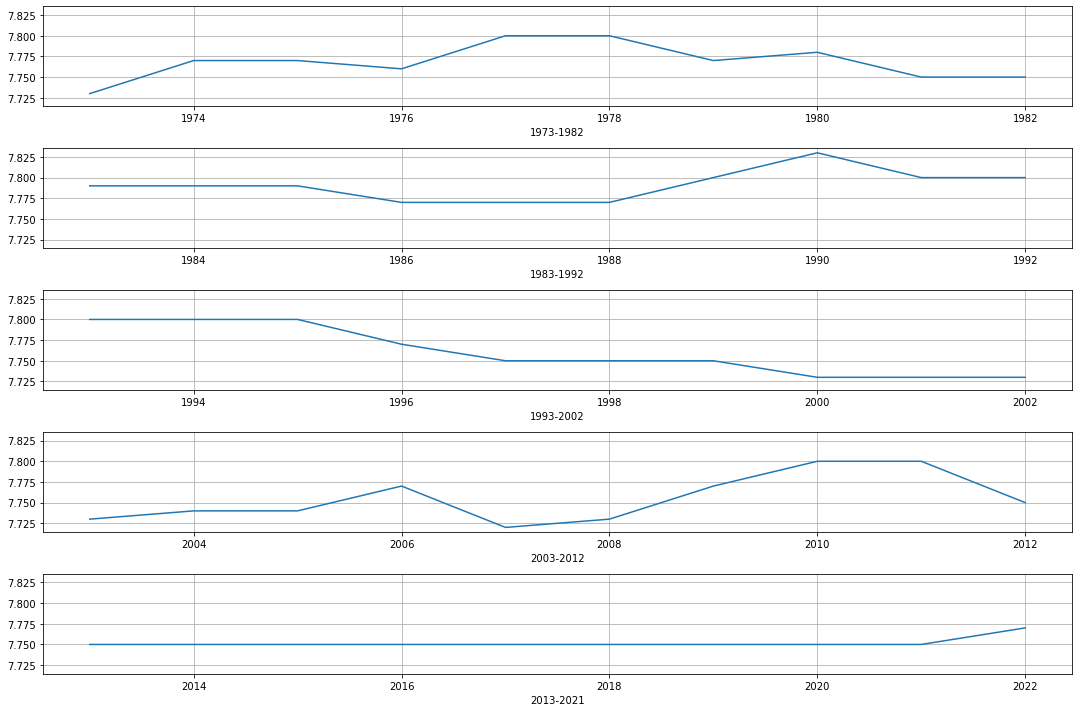

In [29]:
fig, ax = plt.subplots(5, 1, figsize=(15, 10), sharey=True)
df1.loc['1973':'1982']['rate'].plot(xlabel="1973-1982",
                                                stacked=True,
                                                ax=ax[0],
                                                grid=True)
df1.loc['1983':'1992']['rate'].plot(xlabel="1983-1992",
                                                stacked=True,
                                                ax=ax[1],
                                                grid=True)
df1.loc['1993':'2002']['rate'].plot(xlabel="1993-2002",
                                                ax=ax[2],
                                                grid=True)
df1.loc['2003':'2012']['rate'].plot(xlabel="2003-2012",
                                                ax=ax[3],
                                                grid=True)
df1.loc['2013':'2022']['rate'].plot(xlabel="2013-2021",
                                                ax=ax[4],
                                                grid=True)
plt.tight_layout()
plt.show()

### Box Plot

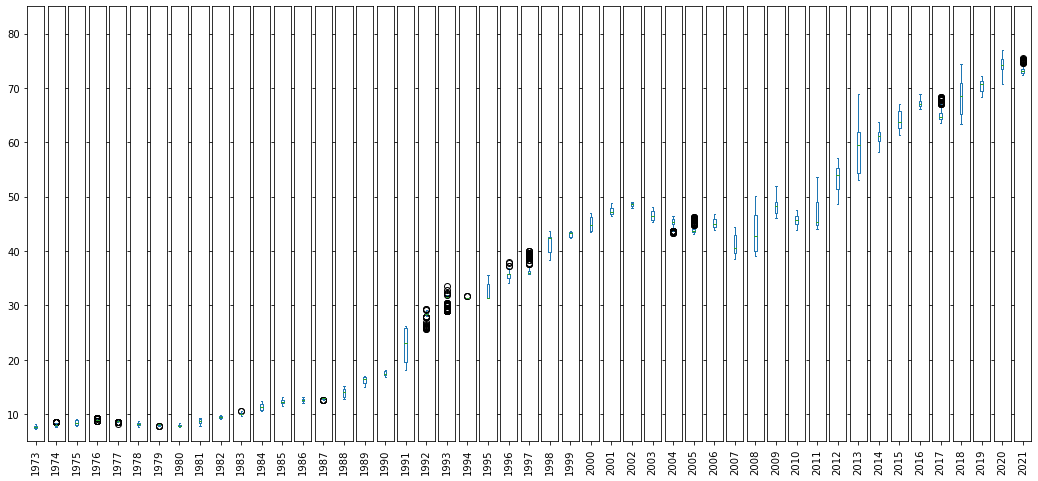

In [30]:
box1 = df1.groupby('Year')

years = list(np.unique(df1.Year))

fig, ax = plt.subplots(1, len(years), figsize=(18, 8), sharey=True)
for i, year in enumerate(years):
    X = box1.get_group(year)
    # subplots=True,layout=(1,len(A)),figsize=(18,8),use_index = True,
    X.plot(y='rate',
           kind='box',
           ax=ax[i],
           label=year,
           rot=90,
           ylim=(5, 85),
           sharey=True)
    plt.tight_layout
#plt.title('box plot');
plt.show()

### Box Plot with 5 years interval

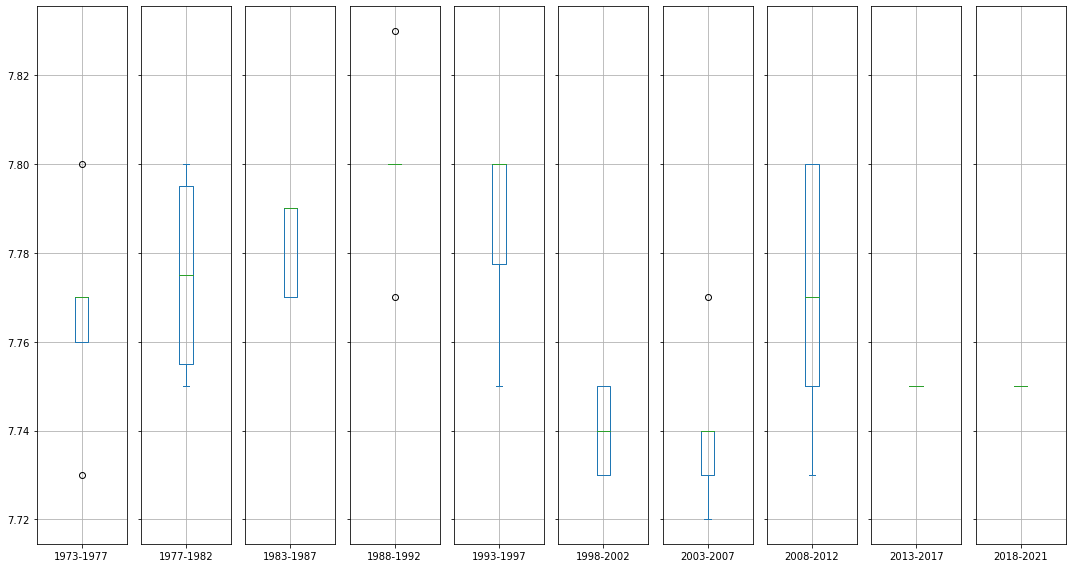

In [31]:
fig, ax = plt.subplots(1, 10, figsize=(15, 8), sharey=True)
df1.loc['1973':'1977']['rate'].plot(kind='box',
                                                label="1973-1977",
                                                stacked=True,
                                                ax=ax[0],
                                                grid=True)
df1.loc['1977':'1982']['rate'].plot(kind='box',
                                                label="1977-1982",
                                                stacked=True,
                                                ax=ax[1],
                                                grid=True)
df1.loc['1983':'1987']['rate'].plot(kind='box',
                                                label="1983-1987",
                                                stacked=True,
                                                ax=ax[2],
                                                grid=True)
df1.loc['1988':'1992']['rate'].plot(kind='box',
                                                label="1988-1992",
                                                stacked=True,
                                                ax=ax[3],
                                                grid=True)
df1.loc['1992':'1997']['rate'].plot(kind='box',
                                                label="1993-1997",
                                                ax=ax[4],
                                                grid=True)
df1.loc['1997':'2002']['rate'].plot(kind='box',
                                                label="1998-2002",
                                                ax=ax[5],
                                                grid=True)
df1.loc['2003':'2007']['rate'].plot(kind='box',
                                                label="2003-2007",
                                                ax=ax[6],
                                                grid=True)
df1.loc['2008':'2012']['rate'].plot(kind='box',
                                                label="2008-2012",
                                                ax=ax[7],
                                                grid=True)
df1.loc['2013':'2017']['rate'].plot(kind='box',
                                                label="2013-2017",
                                                ax=ax[8],
                                                grid=True)
df1.loc['2018':'2021']['rate'].plot(kind='box',
                                                label="2018-2021",
                                                ax=ax[9],
                                                grid=True)
plt.tight_layout()
plt.show()

## PyCaret

In [32]:
#Adding Series into Dataframe
df1['Series'] = np.arange(1,len(df1)+1)

In [33]:
df1.head(1)

,date,rate,Year,Month,Day,Series
0,1973-01-02,8.02,1973,1,2,1


In [34]:
#Droping date
df1.drop(['date'], axis=1, inplace=True)

### Train Test Split

#### Spliting Data

In [35]:
df1_test=df1[df1['Year']<1985]

In [36]:
df1_train=df1[df1['Year']>=1985]

In [37]:
print("Train:",df1_train.shape)
print('Test:',df1_test.shape)

Train: (9519, 5)
Test: (3130, 5)


In [38]:
#Library
from pycaret.regression import *

In [39]:
s = setup(data = df1_train, test_data = df1_test, target = 'rate', fold_strategy = 'timeseries', numeric_features = ['Day', 'Series'], fold = 3, transform_target = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,rate
2,Original Data,"(9519, 5)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(9519, 14)"


In [40]:
best_pycaret = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,2.8829,36.1127,3.4695,-0.6358,0.0879,0.0654,0.5733
xgboost,Extreme Gradient Boosting,8.6123,118.6715,9.8533,-2.8061,0.2004,0.1589,0.4067
lightgbm,Light Gradient Boosting Machine,8.6298,118.2656,9.8434,-2.8045,0.1998,0.1592,0.0633
gbr,Gradient Boosting Regressor,8.6559,117.4471,9.8269,-2.8899,0.1971,0.1592,0.1467
et,Extra Trees Regressor,8.7825,124.0813,10.0119,-2.9237,0.2039,0.1614,0.3233
dt,Decision Tree Regressor,8.8500,125.9306,10.0796,-2.9881,0.2052,0.1626,0.0233
rf,Random Forest Regressor,8.8641,125.9187,10.0829,-2.9912,0.2052,0.1628,0.2633
knn,K Neighbors Regressor,9.0842,130.1866,10.2498,-3.1327,0.2089,0.1669,0.9933
ada,AdaBoost Regressor,9.8182,158.7806,10.9703,-3.8418,0.2238,0.1772,0.0433
par,Passive Aggressive Regressor,20.6155,484.3937,21.2012,-17.7566,0.5595,0.4134,1.8367


In [41]:
prediction_holdout = predict_model(best_pycaret);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,3.5303,13.6633,3.6964,-11.2443,0.3297,0.4190


In [42]:
predictions = predict_model(best_pycaret, data=df1)
predictions

,rate,Year,Month,Day,Series,Label
0,8.020000,1973,1,2,1,12.473104
1,8.020000,1973,1,3,2,12.482605
2,8.000000,1973,1,4,3,12.499421
3,8.010000,1973,1,5,4,12.503120
4,8.000000,1973,1,8,5,12.502136
...,...,...,...,...,...,...
12644,74.180000,2021,6,21,12645,73.926854
12645,74.370003,2021,6,22,12646,73.926854
12646,74.129997,2021,6,23,12647,73.946699
12647,74.139999,2021,6,24,12648,73.987899


## XGBOOST

In [43]:
df2 = final_data.copy()

In [44]:
df2.head(1)

,date,rate
0,1973-01-02,8.02


### Feature Engineering

In [45]:
#extract the date feature
df2['day'] = df2.date.dt.day
df2['dayofweek'] = df2.date.dt.dayofweek
df2['dayofyear'] = df2.date.dt.dayofyear
df2['week'] = df2.date.dt.week
df2['month'] = df2.date.dt.month
df2['year'] = df2.date.dt.year

In [46]:
df2.head(2)

,date,rate,day,dayofweek,dayofyear,week,month,year
0,1973-01-02,8.02,2,1,2,1,1,1973
1,1973-01-03,8.02,3,2,3,1,1,1973


In [47]:
#add lag feature
for i in range(1,8):
    df2['lag'+str(i)] = df2.rate.shift(i).fillna(0)

In [48]:
#drop the date feature
df2.drop('date', axis=1, inplace=True)

In [49]:
#show new data frame
df2.head(7)

,rate,day,dayofweek,dayofyear,week,month,year,lag1,lag2,lag3,lag4,lag5,lag6,lag7
0,8.02,2,1,2,1,1,1973,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,8.02,3,2,3,1,1,1973,8.02,0.00,0.00,0.00,0.00,0.00,0.0
2,8.00,4,3,4,1,1,1973,8.02,8.02,0.00,0.00,0.00,0.00,0.0
3,8.01,5,4,5,1,1,1973,8.00,8.02,8.02,0.00,0.00,0.00,0.0
4,8.00,8,0,8,2,1,1973,8.01,8.00,8.02,8.02,0.00,0.00,0.0
5,8.00,9,1,9,2,1,1973,8.00,8.01,8.00,8.02,8.02,0.00,0.0
6,8.00,10,2,10,2,1,1973,8.00,8.00,8.01,8.00,8.02,8.02,0.0


### Split Data

In [50]:
X = df2.drop('rate', axis=1)
y = df2.rate

X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (12619, 13)
y_train:  (12619,)
X_test:  (30, 13)
y_test:  (30,)


In [51]:
#Librabies
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from bayes_opt import BayesianOptimization

In [52]:
#convert data to xgb matrix form
dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test)

### XGBOOST Baysian Optimization

In [53]:
#bayesian hyper parameter tuning
#define the params
def xgb_evaluate(max_depth, gamma, colsample_bytree):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    
    cv_result = xgb.cv(params, dtrain, num_boost_round=250, nfold=3)    
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [54]:
#run optimizer
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9)})
#define iter points
xgb_bo.maximize(init_points=10, n_iter=15, acq='ei')

|   iter    |  target   | colsam... |   gamma   | max_depth |
-------------------------------------------------------------
|  1        | -0.2265   |  0.612    |  0.5233   |  3.62     |
|  2        | -0.2039   |  0.6646   |  0.4765   |  6.041    |
|  3        | -0.2024   |  0.748    |  0.02656  |  6.596    |
|  4        | -0.2042   |  0.6227   |  0.6187   |  6.629    |
|  5        | -0.2093   |  0.4503   |  0.2094   |  5.03     |
|  6        | -0.2039   |  0.8796   |  0.8871   |  5.487    |
|  7        | -0.2134   |  0.3526   |  0.0577   |  5.844    |
|  8        | -0.2019   |  0.885    |  0.1282   |  5.703    |
|  9        | -0.2036   |  0.8921   |  0.6368   |  5.474    |
|  10       | -0.2121   |  0.4795   |  0.9752   |  5.566    |
|  11       | -0.2018   |  0.9      |  0.367    |  6.205    |
|  12       | -0.2006   |  0.9      |  0.0      |  7.0      |
|  13       | -0.2019   |  0.8996   |  0.3352   |  6.998    |
|  14       | -0.2048   |  0.4402   |  2.099e-0 |  6.992    |
|  15   

In [55]:
#get the best parameters
params = xgb_bo.max['params']
params['max_depth'] = int(round(params['max_depth']))
#train the data
model = xgb.train(params, dtrain, num_boost_round=200)

In [56]:
#predict the test data 
predictions = model.predict(dtest)
predictions

array([73.432655, 73.28542 , 73.32397 , 73.37669 , 73.29173 , 72.84961 ,
       72.71451 , 72.86521 , 72.66204 , 72.59664 , 72.63603 , 72.627464,
       72.80825 , 72.84511 , 73.50278 , 72.84419 , 73.0672  , 72.91266 ,
       72.86227 , 73.36029 , 73.43611 , 73.462105, 73.444595, 73.41473 ,
       73.79323 , 74.11844 , 73.82786 , 74.37643 , 73.86019 , 73.840805],
      dtype=float32)

### Comparision of True values and XGBOOST pridection

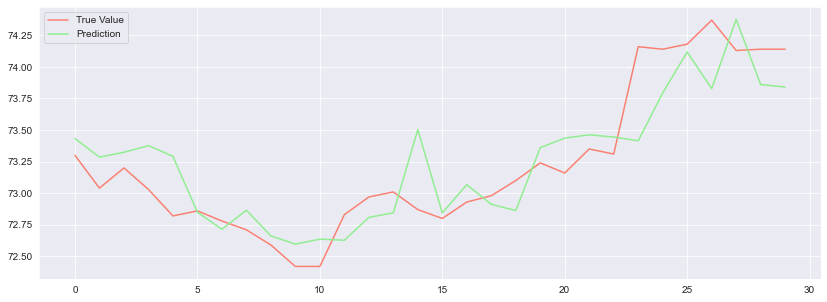

In [57]:
y_val = df2.rate[-30:]
plt.figure(figsize=(14,5))
sns.set_style('darkgrid')
plt.plot(np.arange(len(y_val)), y_val, color='salmon');
plt.plot(np.arange(len(y_val)), predictions, color='lightgreen');
plt.legend(['True Value', 'Prediction']);

### MAE, MSE, RMSE

In [58]:
#METRICS
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, r2_score,mean_absolute_error,mean_squared_error

In [59]:
xgb_mae = mean_absolute_error(y_val, predictions)#
xgb_mse = mean_squared_error(y_val, predictions)
xgb_rmse = np.sqrt(mean_squared_error(y_val, predictions))

print('Mean Absolute Error:   ', xgb_mae)
print('Mean Squared Error:   ', xgb_mse)
print('Root Mean Squared Error:   ', xgb_rmse)

Mean Absolute Error:    0.22763342
Mean Squared Error:    0.0815804
Root Mean Squared Error:    0.28562284


### MEAN ABSOLUTE PERCENTAGE ERROR (MAPE)

In [60]:
xgb_error_rate = abs(((y_val - predictions) / y_val).mean()) * 100
print('Mean Absolute Percentage Error:', round(xgb_error_rate,2), '%')

Mean Absolute Percentage Error: 0.02 %


### R-Squared Score

In [61]:
print('R2-SCORE: ', r2_score(y_val, predictions))

R2-SCORE:  0.7484259195540401


## Monte Carlo Simulation

In [62]:
#function that can generate a monte carlo simulation    
def monte_carlo_simulation(data,t_intervals ,iteration , figsize = (10,4), lw=1):
    from scipy.stats import norm

    #log returns of data
    log_returns = np.log(1 + data.pct_change())

    #Setting up the drift and random component
    mean_  = log_returns.mean()
    var = log_returns.var()
    stdev = log_returns.std()
    drift = mean_ - (0.5 *var)

    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iteration)))

    S0 = data.iloc[-1]
    #Empty daily returns
    price_list = np.zeros_like(daily_returns)
    price_list[0] = S0

    #appliying montecarlo simulation
    for i in range(1 , t_intervals):
        price_list[i] = price_list[i-1] * daily_returns[i]
    fig_title = str(t_intervals)+ ' DAYS SIMULATION WITH ' +str(iteration)+' DIFFERENT POSSIBILITIES'
    #Show the result of 30 days simulation
    plt.figure(figsize=figsize)
    plt.plot(price_list, lw=lw)
    plt.title(fig_title)
    plt.xlabel('Days', fontsize=16)
    plt.ylabel('Rate', fontsize=16)

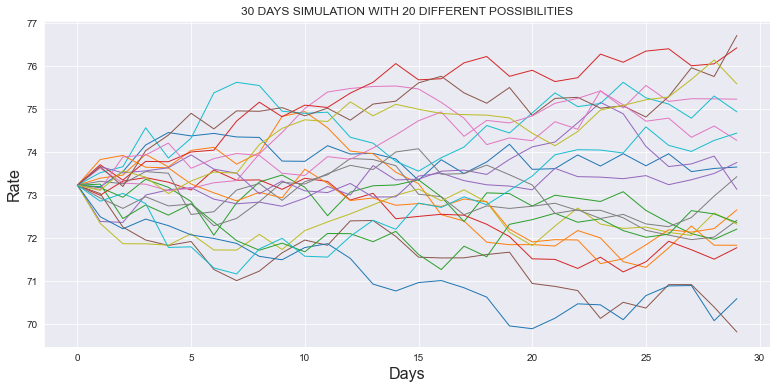

In [63]:
#fit the X_train and show the figure
monte_carlo_simulation(y_train,30,20, figsize=(13,6))